In [34]:
# TUGAS PROJEK SUPERVISED LEARNING
# 1. Membangkitkan Data yg sisaan yg ber autokorelasi (dibuktikan dengan uji Durbin Watson).
# 2. Membangkitkan data X yang saling multikolinearitas (dibuktikan dengan uji VIF).
# 3. Membangkitkan data dengan sisaan Normal baku (0,1) , dibuktikan dengan uji kenormalan.
# 4. Membangkitkan data dengan sisaan tidak homogen (dibuktikan dengan uji BP).

In [35]:
# 1. Membangkitkan Data yg sisaan yg ber autokorelasi (dibuktikan dengan uji Durbin Watson).

In [36]:
# PACKAGE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

In [40]:
# MEMBANGKITKAN DATA

np.random.seed(123)
n = 160

# PARAMETER
beta_0 = 5
beta_1 = 2
rho = 0.8

# ERROR
ar = np.array([1, -rho]) 
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)
u = arma_process.generate_sample(nsample=n, scale=3)

# VARIABEL X
var_x = np.random.normal(loc=60, scale=10, size=n)

# VARIABEL Y
var_y = beta_0 + beta_1 * var_x + u

# Membentuk DataFrame
data = pd.DataFrame({'var_x': var_x, 'var_y': var_y})

In [42]:
# MODEL REGRESI

X = sm.add_constant(var_x) #intercept
model_reg = sm.OLS(var_y, X).fit()
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1879.
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           1.27e-89
Time:                        22:31:48   Log-Likelihood:                -496.02
No. Observations:                 160   AIC:                             996.0
Df Residuals:                     158   BIC:                             1002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2058      2.755      2.253      0.0

In [44]:
# UJI DURBIN WATSON

dw_test = durbin_watson(model_reg.resid)
print(f"Durbin Watson: {dw_test: .5f}")

# INTERPRETASI HASIL
if dw_test < 2:
    print("Terdapat indikasi autokorelasi positif pada residual")
elif dw_test > 2:
    print("Terdapat indikasi autokorelasi negatif pada residual")
else :
    print("Tidak terdapat autokorelasi pada residual")

Durbin Watson:  0.40292
Terdapat indikasi autokorelasi positif pada residual


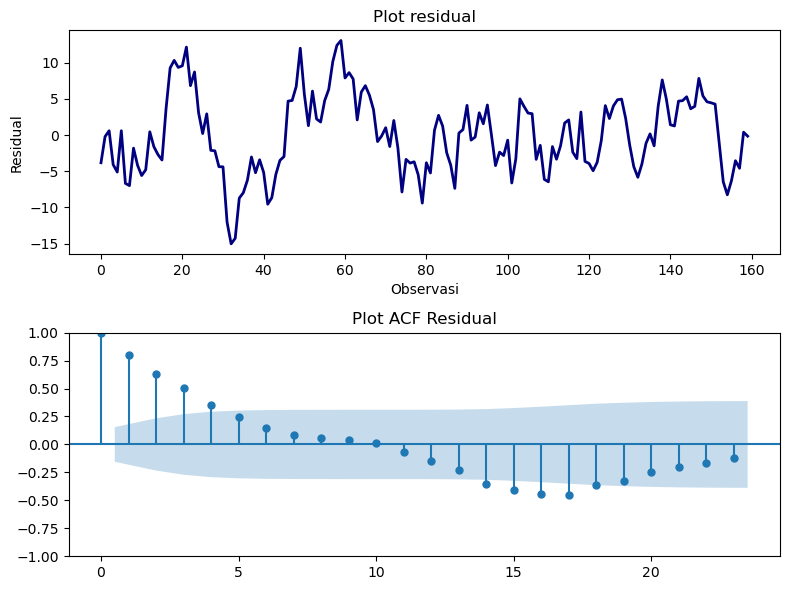

In [45]:
# VISUALISASI

fig, ax = plt.subplots(2, 1, figsize = (8,6))

# PLOT RESIDUAL
ax[0].plot(model_reg.resid, color = 'navy', linewidth = 2)
ax[0].set_title('Plot residual')
ax[0].set_xlabel('Observasi')
ax[0].set_ylabel('Residual')

# PLOT ACF
sm.graphics.tsa.plot_acf(model_reg.resid, ax = ax[1])
ax[1].set_title('Plot ACF Residual')

plt.tight_layout()
plt.show()

In [8]:
# 2. Membangkitkan data X yang saling multikolinearitas (dibuktikan dengan uji VIF).

In [46]:
# PACKAGE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [47]:
# MEMBANGKITKAN DATA

np.random.seed(123)
n = 150

# VARIABEL X
var_x1 = np.random.normal(0, 1, n)
var_x2 = 0.9 * var_x1 + np.random.normal(0, 0.1, n)
var_x3 = 0.5 * var_x1 + 0.4 * var_x2 + np.random.normal(0, 0.1, n)

# VARIABEL Y
var_y = 2 * var_x1 + 3 * var_x2 + 4 * var_x3 + np.random.normal(0, 1, n)

# DATA FRAME
data = pd.DataFrame({
    'var_x1': var_x1,
    'var_x2': var_x2,
    'var_x3': var_x3,
    'var_y': var_y
})

print(data.head())

     var_x1    var_x2    var_x3      var_y
0 -1.085631 -0.951686 -0.846984  -8.284870
1  0.997345  0.925983  0.786167   6.654766
2  0.282978  0.113492  0.120971  -0.012674
3 -1.506295 -1.543352 -1.309376 -13.517841
4 -0.578600 -0.622706 -0.552784  -5.562970


In [48]:
# MODEL REGRESI

X = sm.add_constant(data[['var_x1', 'var_x2', 'var_x3']])
y = data['var_y']

model_reg = sm.OLS(y, X).fit()
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  var_y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     3770.
Date:                Mon, 06 Oct 2025   Prob (F-statistic):          4.71e-138
Time:                        22:40:48   Log-Likelihood:                -213.93
No. Observations:                 150   AIC:                             435.9
Df Residuals:                     146   BIC:                             447.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0915      0.085      1.082      0.2

In [49]:
# MENGHITUNG VIF

vif_data = pd.DataFrame()
vif_data['Variabel'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print("\nNilai VIF setiap variabel:\n")
print(vif_data)


Nilai VIF setiap variabel:

  Variabel         VIF
0    const    1.028736
1   var_x1  154.132803
2   var_x2  117.317226
3   var_x3  102.774231


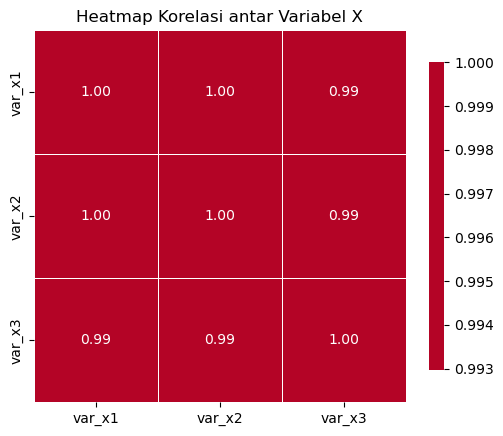

In [50]:
# VISUALISASI

corr_matrix = data[['var_x1', 'var_x2', 'var_x3']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt=".2f", linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title("Heatmap Korelasi antar Variabel X")
plt.show()

In [14]:
# 3. Membangkitkan data dengan sisaan Normal baku (0,1) , dibuktikan dengan uji kenormalan.

In [51]:
# PACKAGE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [52]:
# MEMBANGKITKAN DATA

np.random.seed(123)
n = 200

# PARAMETER
beta_0 = 10
beta_1 = 2.5

# ERROR
error = np.random.normal(0, 1, n)

# VARIABEL X
var_x = np.random.normal(50, 10, n)

# VARIABEL Y
var_y = beta_0 + beta_1 * var_x + error

In [53]:
# MODEL REGRESI

X = sm.add_constant(var_x)  # Menambahkan intercept
model_reg = sm.OLS(var_y, X).fit()
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 9.584e+04
Date:                Mon, 06 Oct 2025   Prob (F-statistic):          7.25e-268
Time:                        22:43:43   Log-Likelihood:                -293.99
No. Observations:                 200   AIC:                             592.0
Df Residuals:                     198   BIC:                             598.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9678      0.402     24.816      0.0

In [54]:
# UJI NORMALITAS

resi = model_reg.resid

# Uji Shapiro–Wilk
shapiro_test = stats.shapiro(resi)
print("\nUji Shapiro–Wilk:")
print(f"Statistic = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")

# Memeriksa mean dan SD residual
mean_resi = np.mean(resi)
sd_resi = np.std(resi, ddof=1)
print(f"Mean of Residuals: {mean_resi:.4f}")
print(f"Standard Deviation of Residuals: {sd_resi:.4f}")


Uji Shapiro–Wilk:
Statistic = 0.9960, p-value = 0.8777
Mean of Residuals: 0.0000
Standard Deviation of Residuals: 1.0550


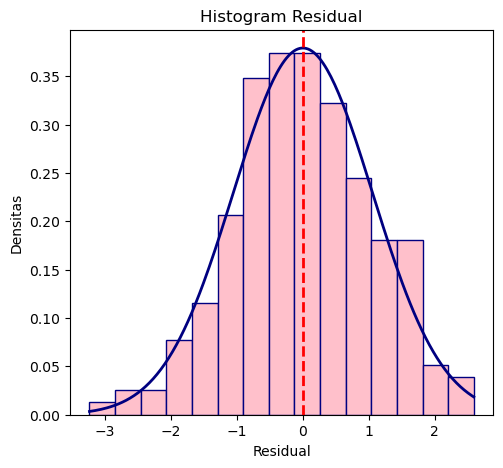

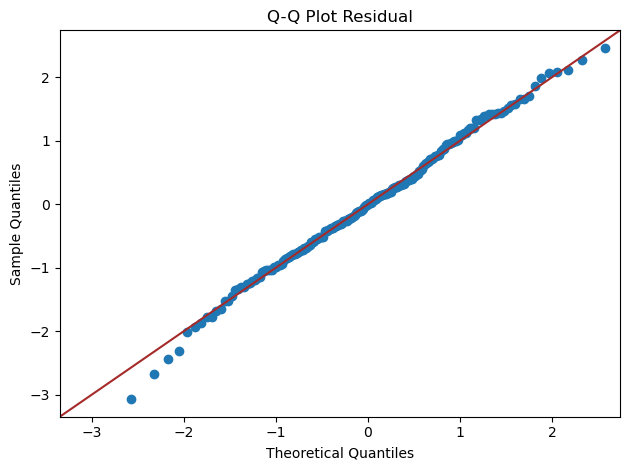

In [55]:
# VISUALISASI

plt.figure(figsize=(12, 5))

# HISTOGRAM + KURVA NORMAL
plt.subplot(1, 2, 1)
plt.hist(resi, bins=15, color='pink', edgecolor='navy', density=True)
x_vals = np.linspace(min(resi), max(resi), 200)
plt.plot(x_vals, stats.norm.pdf(x_vals, np.mean(resi), np.std(resi)), 'navy', lw=2)
plt.axvline(np.mean(resi), color='red', lw=2, ls='--')
plt.title("Histogram Residual")
plt.xlabel("Residual")
plt.ylabel("Densitas")

# QQ PLOT
qq = sm.qqplot(resi, line='45', fit=True)
plt.setp(qq.findobj(plt.Line2D), color='brown')
plt.title("Q-Q Plot Residual")

plt.tight_layout()
plt.show()

In [20]:
# 4. Membangkitkan data dengan sisaan tidak homogen (dibuktikan dengan uji BP)

In [56]:
# PACKAGE

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# MEMBANGKITKAN DATA

np.random.seed(123)
n = 200

# Variabel X
var_x = np.random.normal(loc=50, scale=10, size=n)

# Error
error = np.random.normal(loc=0, scale=var_x)

# Variabel Y
var_y = 5 + 2 * var_x + error

In [58]:
# MODEL REGRESI

X = sm.add_constant(var_x)
model_reg = sm.OLS(var_y, X).fit()

# Ringkasan hasil
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     39.52
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           2.03e-09
Time:                        22:45:48   Log-Likelihood:                -1055.8
No. Observations:                 200   AIC:                             2116.
Df Residuals:                     198   BIC:                             2122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4056     16.388     -0.086      0.9

In [59]:
# UJI BP

bp_test = het_breuschpagan(model_reg.resid, model_reg.model.exog)

# Menampilkan hasil
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(labels, bp_test))
print("Breusch-Pagan Test:")
for k, v in bp_results.items():
    print(f"{k}: {v:.4f}")

Breusch-Pagan Test:
LM Statistic: 11.4240
LM-Test p-value: 0.0007
F-Statistic: 11.9949
F-Test p-value: 0.0007


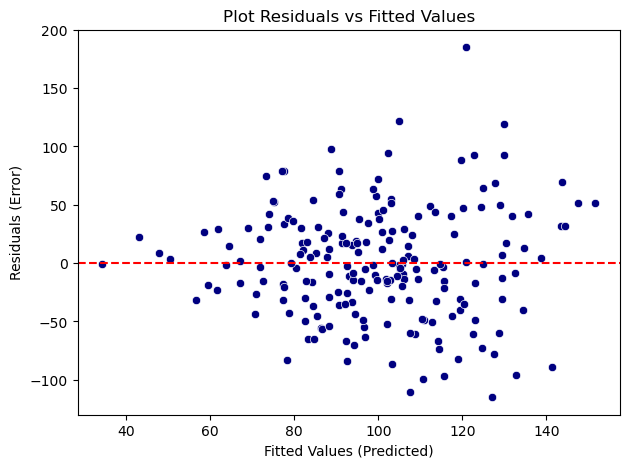

In [33]:
# VISUALISASI

# Nilai fitted dan residual
fitted_values = model_reg.fittedvalues
residuals = model_reg.resid

# Plot Residuals vs Fitted Values
plt.figure(figsize=(7, 5))
sns.scatterplot(x=fitted_values, y=residuals, color='navy')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Plot Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals (Error)")
plt.show()